In [13]:
# Import thư viện
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [26]:
# Chuẩn bị dữ liệu
data = pd.read_csv('../../Data/Social_Network_Ads.csv')
print(data.info(), '\n')
print("======================================================================")
print(data.head())

x = data.drop(['User ID', 'EstimatedSalary_K', 'Purchased'], axis = 1)
x.head()

print("==================================================================")

y = data.Purchased
print(y.head())

print("==================================================================")

print("Các nhãn (classes):", y.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            400 non-null    int64 
 1   Gender             400 non-null    object
 2   Age                400 non-null    int64 
 3   EstimatedSalary    400 non-null    int64 
 4   EstimatedSalary_K  400 non-null    int64 
 5   Purchased          400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB
None 

    User ID  Gender  Age  EstimatedSalary  EstimatedSalary_K  Purchased
0  15624510    Male   19            19000                 19          0
1  15810944    Male   35            20000                 20          0
2  15668575  Female   26            43000                 43          0
3  15603246  Female   27            57000                 57          0
4  15804002    Male   19            76000                 76          0
0    0
1    0
2    0
3    0
4 

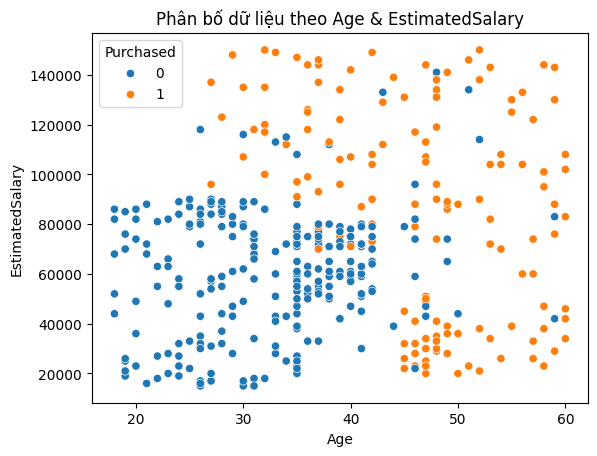

In [24]:
# Biểu diễn trực quan
sbn.scatterplot(x='Age', y='EstimatedSalary', data=data, hue='Purchased')
plt.title("Phân bố dữ liệu theo Age & EstimatedSalary")
plt.show()

In [ ]:
# Chuyển Gender thành kiểu Numerical
sex = {'Male':1, 'Female':0}
x['Male'] = [sex[i] for i in data.Gender]
x  = x.drop(['Gender'], axis = 1)

print(pd.concat([x, y], axis = 1).head())

   Age  EstimatedSalary  Male  Purchased
0   19            19000     1          0
1   35            20000     1          0
2   26            43000     0          0
3   27            57000     0          0
4   19            76000     1          0


In [29]:
# Chia dữ liệu train/test 80/20
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

print(f"Training size: {x_train.shape[0]}, Test size: {x_test.shape[0]}")

Training size: 320, Test size: 80


In [ ]:
# Chọn K: Cách 1
k = int(pow(x_train.shape[0], 1/2) / 2)
print(f"Giá trị k được chọn = {k}")

k =  2 --> accuracy ~ 72.500000%
k =  3 --> accuracy ~ 81.250000%
k =  4 --> accuracy ~ 80.000000%
k =  5 --> accuracy ~ 80.000000%
k =  6 --> accuracy ~ 80.000000%
k =  7 --> accuracy ~ 82.500000%
k =  8 --> accuracy ~ 82.500000%
k =  9 --> accuracy ~ 85.000000%
k = 10 --> accuracy ~ 82.500000%
k = 11 --> accuracy ~ 80.000000%
k = 12 --> accuracy ~ 80.000000%
k = 13 --> accuracy ~ 80.000000%
k = 14 --> accuracy ~ 80.000000%
k = 15 --> accuracy ~ 81.250000%
k = 16 --> accuracy ~ 80.000000%
k = 17 --> accuracy ~ 78.750000%


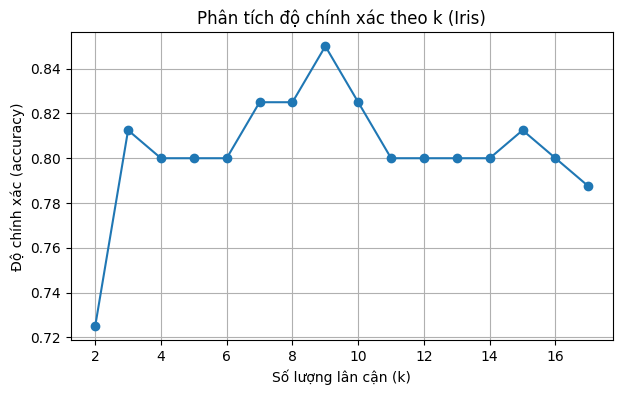

✅ Giá trị k = 9 có accuracy cao nhất (85.00%)


In [37]:
# Chọn K: Cách 2
list_k, list_acc = [], []

for k in range(2, int(pow(x_train.shape[0], 1/2) / 2) + 10):
    list_k.append(k)
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train, y_train)
    acc = accuracy_score(y_test, neigh.predict(x_test))
    list_acc.append(acc)
    print(f'k = {k:2d} --> accuracy ~ {acc*100:1f}%')

# Vẽ biểu đồ accuracy theo k
plt.figure(figsize=(7,4))
plt.plot(list_k, list_acc, marker='o')
plt.xlabel('Số lượng lân cận (k)')
plt.ylabel('Độ chính xác (accuracy)')
plt.title('Phân tích độ chính xác theo k (Iris)')
plt.grid(True)
plt.show()

# Chọn k tối ưu
k = list_k[np.argmax(list_acc)]
print(f'✅ Giá trị k = {k} có accuracy cao nhất ({max(list_acc)*100:.2f}%)')

In [38]:
# Xây dựng mô hình KNN
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
# Lưu mô hình
output_path = '../Output/kNN_Sna.pkl'
jlb.dump(knn, output_path)
print(f"✅ Đã lưu mô hình tại: {output_path}")

✅ Đã lưu mô hình tại: ../Output/kNN_Sna.pkl


In [40]:
# Dự đoán và kiểm thử
model = jlb.load(output_path)
y_pred = model.predict(x_test)

In [41]:
# So sánh kết quả
df_compare = pd.DataFrame({'Thực tế': y_test.values, 'Dự đoán': y_pred})
print(df_compare.head(10))

print(f"\nSố trường hợp dự đoán ĐÚNG: {(y_pred == y_test).sum()}/{len(y_test)}")

   Thực tế  Dự đoán
0        0        0
1        0        1
2        0        0
3        0        0
4        0        0
5        1        1
6        0        0
7        1        1
8        1        0
9        1        0

Số trường hợp dự đoán ĐÚNG: 68/80


In [42]:
# Đánh giá mô hinh
def classification_eval(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

scores = classification_eval(y_test, y_pred)

print("\n=== 🔍 ĐÁNH GIÁ MÔ HÌNH ===")
for metric, value in scores.items():
    print(f"{metric:15s}: {value*100:.2f}%")

print("\n=== 📊 BÁO CÁO CHI TIẾT ===")
print(classification_report(y_test, y_pred, target_names=["KHÔNG MUA", "MUA"]))


=== 🔍 ĐÁNH GIÁ MÔ HÌNH ===
Accuracy       : 85.00%
Precision      : 81.48%
Recall         : 75.86%
F1-score       : 78.57%

=== 📊 BÁO CÁO CHI TIẾT ===
              precision    recall  f1-score   support

   KHÔNG MUA       0.87      0.90      0.88        51
         MUA       0.81      0.76      0.79        29

    accuracy                           0.85        80
   macro avg       0.84      0.83      0.84        80
weighted avg       0.85      0.85      0.85        80



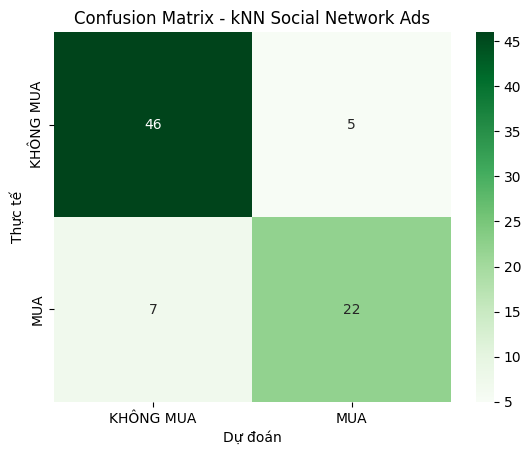

In [43]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sbn.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["KHÔNG MUA", "MUA"],
            yticklabels=["KHÔNG MUA", "MUA"])
plt.title("Confusion Matrix - kNN Social Network Ads")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

In [44]:
# Dự đoán
labels = np.array(['KHÔNG mua', 'MUA'])

while True:
    try:
        idx = int(input(f"Nhập chỉ số dòng (0 → {len(x_test)-1}) hoặc -1 để thoát: "))
        if idx == -1:
            break
        if 0 <= idx < len(x_test):
            x_new = x_test.iloc[[idx]]
            y_hat = model.predict(x_new)[0]
            print(f"\nMẫu {x_new.to_string()}:\n{x_new.to_string(index=False)}")
            print(f"👉 Dự đoán: {labels[y_hat]}\n")
        else:
            print("❌ Chỉ số không hợp lệ.")
    except ValueError:
        print("❌ Vui lòng nhập số hợp lệ.")


Mẫu      Age  EstimatedSalary  Male
163   35            38000     1:
 Age  EstimatedSalary  Male
  35            38000     1
👉 Dự đoán: KHÔNG mua


Mẫu      Age  EstimatedSalary  Male
165   18            86000     0:
 Age  EstimatedSalary  Male
  18            86000     0
👉 Dự đoán: KHÔNG mua

